# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import scatter_matrix
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

import statsmodels.api as sm 
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.api import VAR
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from keras.models import Sequential
from keras.layers import LSTM, Dense
from xgboost import XGBRegressor

import mplfinance as mpf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

import tensorflow as tf
import pmdarima as pm
import tsfresh

import plotly.express as px
import tensorflow as tf
import yfinance as yf

from timeit import default_timer as timer
from math import sqrt

2024-04-23 08:26:16.173382: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import random
random.seed(42)

pandas (import pandas as pd): Data manipulation and analysis library. 

matplotlib (import matplotlib.pyplot as plt):Plotting library for static, animated, and interactive visualizations.

numpy (import numpy as np): Numerical computing library. Provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays.

seasonal_decompose (from statsmodels.tsa.seasonal import seasonal_decompose):decomposing a time series into trend, seasonal, and residual components.

scatter_matrix (from pandas.plotting import scatter_matrix): matrix of scatter plots for multiple features.

adfuller (from statsmodels.tsa.stattools import adfuller): Augmented Dickey-Fuller test for stationarity of a time series.

%matplotlib inline: display matplotlib plots inline within the Jupyter notebook.

statsmodels (import statsmodels.api as sm):classes and functions for the estimation of statistical models, conducting statistical tests, etc.

plot_acf & plot_pacf (from statsmodels.graphics.tsaplots import plot_acf, plot_pacf):visualize autocorrelation and partial autocorrelation functions.

SARIMAX (from statsmodels.tsa.statespace.sarimax import SARIMAX): Seasonal AutoRegressive Integrated Moving Average with eXogenous factors model for time series forecasting.

ExponentialSmoothing (from statsmodels.tsa.holtwinters import ExponentialSmoothing):Holt-Winters Exponential Smoothing model for time series forecasting.

VAR (from statsmodels.tsa.api import VAR):Vector Autoregression model for multivariate time series forecasting.

ARIMA (from statsmodels.tsa.arima.model import ARIMA):AutoRegressive Integrated Moving Average model for time series forecasting.

plot_predict (from statsmodels.graphics.tsaplots import plot_predict):plot predictions from time series forecasting models.

sklearn (import sklearn):machine learning library.

train_test_split (from sklearn.model_selection import train_test_split): Splits datasets into training and testing subsets.

keras (from keras.models import Sequential & from keras.layers import LSTM, Dense): High-level neural networks API. Components for building neural network models.

XGBRegressor (from xgboost import XGBRegressor):XGBoost regression model.

mplfinance (import mplfinance as mpf): financial and stock market charting.

pmdarima (import pmdarima as pm):Python wrapper for the ARIMA library statsmodels.

tsfresh (import tsfresh): Feature extraction library for time series data.

plotly.express (import plotly.express as px):High-level interface for creating interactive plots with Plotly.

yfinance (import yfinance as yf):historical market data from Yahoo Finance.

default_timer (from timeit import default_timer as timer):Timer function to measure time taken for code execution.

sqrt (from math import sqrt):Square root function from the math module.

random seed: stop data from shuffling

# Uploading Data

In [3]:
#ticker_symbol = "GC=F"  # Gold futures
#df = yf.download(ticker_symbol, start="2015-01-01", end="2024-04-17")

In [4]:
ticker_symbol = "BZ=F"  
df = yf.download(ticker_symbol, start="2015-01-01", end="2024-12-31")


[*********************100%%**********************]  1 of 1 completed


In [5]:
# Saving the data to a CSV file
#df.to_csv('GC_F.csv')

#print("Data saved to GC_F.csv")

In [6]:
#Defining Actual Data for the last 30 days for later reference
last_30_days_actual = df['Close'].iloc[-30:]

In [7]:
Actual_Data=df['Close']

In [8]:
target_column = 'Close'

Gold Data from Yahoo Finance

# Exploration

In [9]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,57.630001,58.220001,55.520000,56.419998,56.419998,16707
2015-01-05,56.290001,56.290001,52.669998,53.110001,53.110001,30065
2015-01-06,53.230000,53.520000,50.529999,51.099998,51.099998,35494
2015-01-07,51.060001,51.840000,49.680000,51.150002,51.150002,37082
2015-01-08,51.000000,51.889999,49.820000,50.959999,50.959999,29469


1st 5 columns

In [10]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-17,90.050003,90.150002,87.139999,87.290001,87.290001,45933
2024-04-18,87.440002,87.790001,86.099998,87.110001,87.110001,38630
2024-04-19,86.959999,90.779999,86.160004,87.290001,87.290001,45203
2024-04-22,87.040001,87.250000,85.790001,87.000000,87.000000,45203
2024-04-23,87.230003,87.540001,87.000000,87.209999,87.209999,473


Last 5 columns

In [11]:
df.shape

(2336, 6)

In [12]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2336 entries, 2015-01-02 to 2024-04-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2336 non-null   float64
 1   High       2336 non-null   float64
 2   Low        2336 non-null   float64
 3   Close      2336 non-null   float64
 4   Adj Close  2336 non-null   float64
 5   Volume     2336 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 127.8 KB


<class 'pandas.core.frame.DataFrame'>: Indicates that the object is a pandas DataFrame.

DatetimeIndex: 2337 entries, 2015-01-02 to 2024-04-16:
The DataFrame has a DatetimeIndex, meaning the index consists of datetime values.
There are 2337 entries or rows in the DataFrame.
The datetime index ranges from January 2, 2015, to April 16, 2024.

Data columns (total 6 columns)::
There are 6 columns in total.

Columns:
Open: Represents the opening price of the stock or asset.
High: Represents the highest price reached during the trading day.
Low: Represents the lowest price reached during the trading day.
Close: Represents the closing price of the stock or asset.
Adj Close: Represents the adjusted closing price, which accounts for factors like dividends and stock splits.
Volume: Represents the number of shares or contracts traded during the day.

Non-Null Count: Indicates the number of non-null (non-missing) values for each column.
All columns have 2337 non-null values, meaning there are no missing values in the DataFrame.

Dtype: Specifies the data type of each column.
float64: The columns 'Open', 'High', 'Low', 'Close', and 'Adj Close' are of type float64, meaning they store floating-point numbers.
int64: The 'Volume' column is of type int64, meaning it stores integers.

memory usage: 127.8 KB: Indicates the memory usage of the DataFrame.
The DataFrame occupies approximately 127.8 kilobytes (KB) of memory.


In [14]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000
mean,65.556725,66.578934,64.516336,65.568994,65.568994,28899.151541
std,18.767712,19.085675,18.460125,18.796831,18.796831,12368.483959
min,19.559999,21.270000,16.000000,19.330000,19.330000,0.000000
25%,50.967501,51.682499,50.235002,50.877501,50.877501,21836.250000
50%,64.055000,64.889999,63.230000,64.150002,64.150002,28586.500000
75%,78.182501,79.345001,77.339996,78.192501,78.192501,35555.250000
max,129.570007,137.000000,122.500000,127.980003,127.980003,87185.000000


count: # of non-null (non-missing) values for each column.
All columns have 2337 non-null values, confirming there are no missing values in the DataFrame.

mean:Average value for each column. 

std: Standard deviation, which measures the amount of variation or dispersion of values from the mean.

min:Minimum value for each column.

25%, 50%, 75% (Quartiles):quartiles or percentile values for each column.
25% (Q1 or First Quartile): 25% of the data falls below this value.
50% (Q2 or Median): 50% of the data falls below this value (also known as the median).
75% (Q3 or Third Quartile): 75% of the data falls below this value.

max: Maximum value for each column.

**Values: e+09: This notation represents scientific notation. For example, 4.017117e+09 translates to 4.017117 x 10^9 or 4,017,117,000.

In [15]:
df["Daily Return"] = (df["Close"] / df["Close"].shift(1)) - 1

total_daily_return = df["Daily Return"].sum()

monthly_returns = df.resample("MS").first()["Close"].pct_change() #MS=Month Start
total_monthly_return = monthly_returns.sum()

annual_return = (1 + df["Daily Return"]).prod() - 1
annual_return = annual_return * 252

print("Total Daily Return:")
print(total_daily_return)

print("\nTotal Monthly Return:")
print(total_monthly_return)

print("\nTotal Annual Return:")
print(annual_return)


Total Daily Return:
1.247878856060821

Total Monthly Return:
1.1595278124615969

Total Annual Return:
137.5235817533858


# Checking for Defaults

In [16]:
df.isnull().apply(pd.value_counts)

,Open,High,Low,Close,Adj Close,Volume,Daily Return
False,2336.0,2336.0,2336.0,2336.0,2336.0,2336.0,2335
True,NaN,NaN,NaN,NaN,NaN,NaN,1


1 null value in the Daily Return column

Index of the missing value

In [17]:
print(df["Daily Return"].isnull().idxmax()) 

2015-01-02 00:00:00


In [18]:
print (" Number of Rows duplicated : ", df.duplicated(keep=False).sum()) #sum of duplicated data

 Number of Rows duplicated :  0


# PreProcessing

Filling null values with Median

In [19]:
num_columns = df.select_dtypes(include=['number']).columns
for col in num_columns:
    median = df[col].median()
    df[col].fillna(median, inplace=True)

df

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2015-01-02,57.630001,58.220001,55.520000,56.419998,56.419998,16707,0.000880
2015-01-05,56.290001,56.290001,52.669998,53.110001,53.110001,30065,-0.058667
2015-01-06,53.230000,53.520000,50.529999,51.099998,51.099998,35494,-0.037846
2015-01-07,51.060001,51.840000,49.680000,51.150002,51.150002,37082,0.000979
2015-01-08,51.000000,51.889999,49.820000,50.959999,50.959999,29469,-0.003715
...,...,...,...,...,...,...,...
2024-04-17,90.050003,90.150002,87.139999,87.290001,87.290001,45933,-0.030327
2024-04-18,87.440002,87.790001,86.099998,87.110001,87.110001,38630,-0.002062
2024-04-19,86.959999,90.779999,86.160004,87.290001,87.290001,45203,0.002066


Checking if there are any remaining missing values in Daily Return

In [20]:
print(df["Close"].isnull().sum())

0


Feature Engineering:

In [21]:
Month= df['Month'] = df.index.month
Year= df['Year'] = df.index.year

df['Series'] = np.arange(1, len(df) + 1)
df['Series'] = np.arange(1,len(df)+1)

- Extracting month & year from date index
- New column named 'Series' in the DataFrame df.np.arange(1, len(df) + 1) generates a sequence of numbers starting from 1 to the length of the DataFrame df.

In [22]:
X=df[['Series', 'Year', 'Month', 'Open', 'High', 'Low', 'Close', 'Volume']] 
Y=df['Close']

X:independent variables for the model.These features will be used to predict the closing price ('Close').

Y:
Selects the target variable or dependent variable for the model.

In [23]:
df

,Open,High,Low,Close,Adj Close,Volume,Daily Return,Month,Year,Series
Date,,,,,,,,,,
2015-01-02,57.630001,58.220001,55.520000,56.419998,56.419998,16707,0.000880,1,2015,1
2015-01-05,56.290001,56.290001,52.669998,53.110001,53.110001,30065,-0.058667,1,2015,2
2015-01-06,53.230000,53.520000,50.529999,51.099998,51.099998,35494,-0.037846,1,2015,3
2015-01-07,51.060001,51.840000,49.680000,51.150002,51.150002,37082,0.000979,1,2015,4
2015-01-08,51.000000,51.889999,49.820000,50.959999,50.959999,29469,-0.003715,1,2015,5
...,...,...,...,...,...,...,...,...,...,...
2024-04-17,90.050003,90.150002,87.139999,87.290001,87.290001,45933,-0.030327,4,2024,2332
2024-04-18,87.440002,87.790001,86.099998,87.110001,87.110001,38630,-0.002062,4,2024,2333
2024-04-19,86.959999,90.779999,86.160004,87.290001,87.290001,45203,0.002066,4,2024,2334


# Visualization

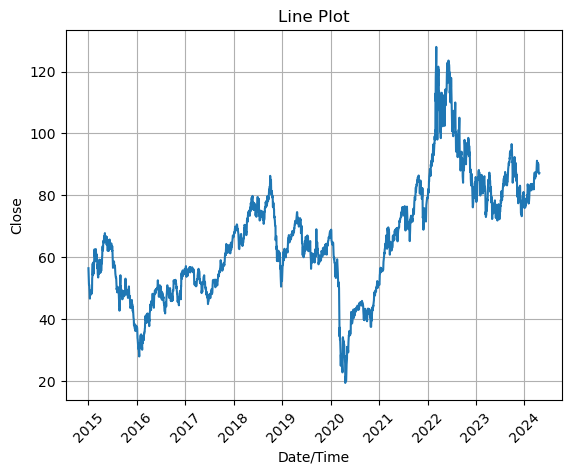

In [24]:
def visualize_line_plot(df, columns_to_plot):

  plt.plot(df.index, df[columns_to_plot])
  plt.xlabel('Date/Time')
  plt.ylabel('Close')
  plt.title(title)
  plt.xticks(rotation=45)  
  plt.grid(True)  
  plt.show()

columns_to_plot = ['Close'] 
title= 'Line Plot'
visualize_line_plot(df.copy(), columns_to_plot) 


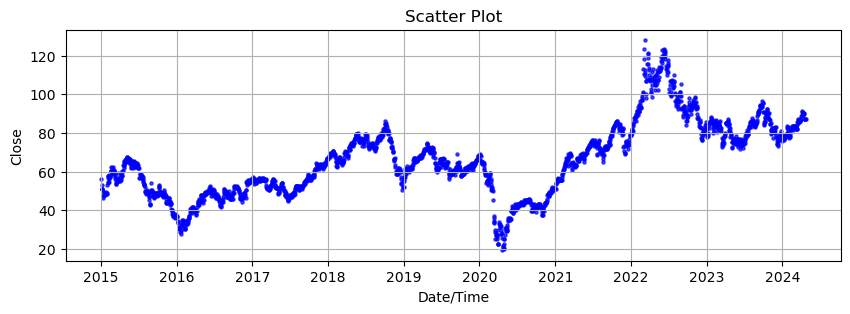

In [25]:
def visualize_scatter_plot(df, y_column, title="Scatter Plot"):

  plt.figure(figsize=(10, 3))  
  plt.scatter(df.index, df[y_column], color='blue', alpha=0.7, s=5) 
  plt.xlabel('Date/Time')
  plt.ylabel(y_column)
  plt.title(title)
  plt.grid(True)
  plt.show()


y_column = 'Close'  
title = 'Scatter Plot'
visualize_scatter_plot(df.copy(), y_column, title)  

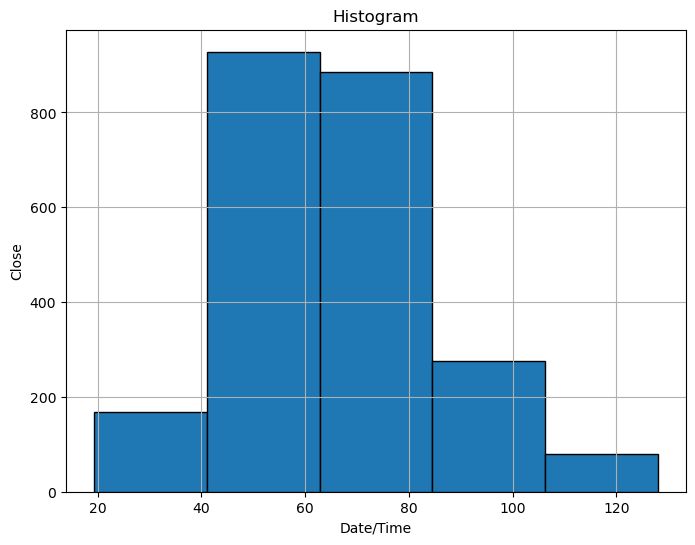

In [26]:
def visualize_histogram(df, y_column, title="Histogram"):


  plt.figure(figsize=(8, 6))
  plt.hist(df[y_column], bins=5, edgecolor='black') 
  plt.xlabel('Date/Time') 
  plt.ylabel('Close')
  plt.title(title)
  plt.grid(True)
  plt.show()

y_column = 'Close' 
title = 'Histogram'
visualize_histogram(df.copy(),y_column, title) 

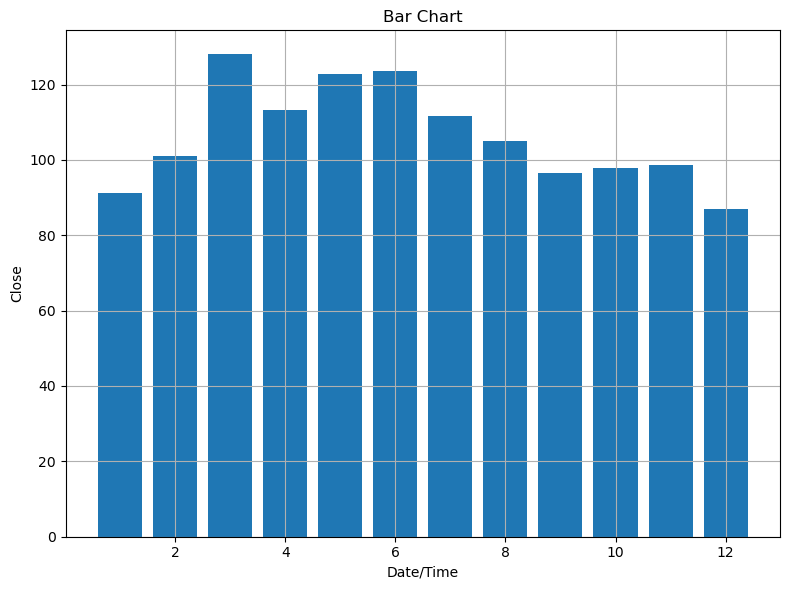

In [27]:
def visualize_bar_chart(df, x_column, y_column, title="Bar Chart"):

  plt.figure(figsize=(8, 6))
  plt.bar(df.index.month, df[y_column])  
    
  plt.xlabel('Date/Time')
  plt.ylabel(y_column)
  plt.title(title)
  plt.xticks(rotation=0) 
  plt.tight_layout()  
  plt.grid(True)
  plt.show()


x_column = 'Index'  
y_column = 'Close'  
title = 'Bar Chart'
visualize_bar_chart(df.copy(), x_column, y_column, title)  


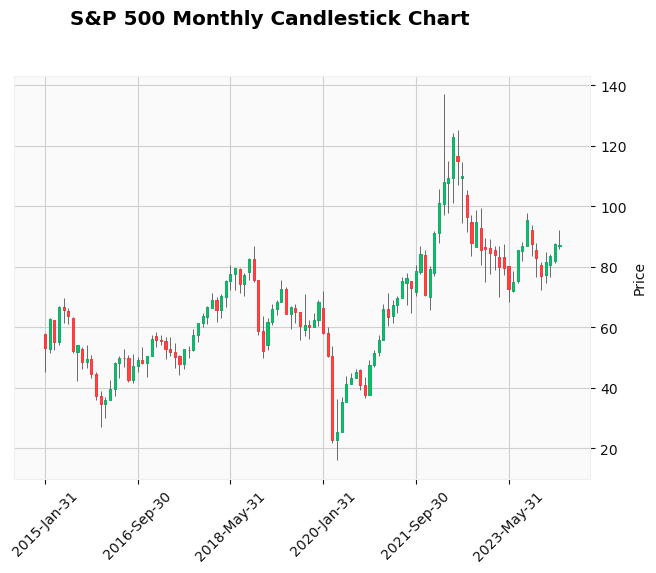

In [28]:
monthly_data = df.resample("M").agg({"Open": "first", "High": "max", "Low": "min", "Close": "last", "Volume": "sum"})

mpf.plot(monthly_data, type="candle", style="yahoo", title="S&P 500 Monthly Candlestick Chart", ylabel="Price")

plt.show()

# Stationarity

>ADF Test

In [29]:
def adf_test(series):
    test_results = adfuller(series)
    print('ADF Statistic: ', test_results[0])
    print('P-Value: ', test_results[1])
    print('Critical Values:')
    for thres, adf_stat in test_results[4].items():
        print('\t%s: %.2f' % (thres, adf_stat))

adf_test(df["Close"][1:])

ADF Statistic:  -1.7443181412604347
P-Value:  0.4084351144239087
Critical Values:
	1%: -3.43
	5%: -2.86
	10%: -2.57


P-Value>0.05 therefore the data is not stationary

>Differencing

In [30]:
df['Close'] = df['Close'] - df['Close'].shift(1)
df = df.dropna()

In [31]:
from statsmodels.tsa.stattools import adfuller

print('Results of ADF Test:')
adftest = adfuller(df['Close'], autolag='AIC')

adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,Close in adftest[4].items():
    adfoutput['Critical Value (%s)'%key] = 'Close'

print(adfoutput)

if adfoutput['p-value'] < 0.05:
    print("stationary.")
else:
    print("not stationary.")


Results of ADF Test:
Test Statistic                -21.870749
p-value                              0.0
#Lags Used                           5.0
Number of Observations Used       2329.0
Critical Value (1%)                Close
Critical Value (5%)                Close
Critical Value (10%)               Close
dtype: object
stationary.


# White Noise

In [32]:
# Generate a sample dataset
np.random.seed(0)
data = df['Close']

# Apply the Augmented Dickey-Fuller test
result = adfuller(data)

# Extract relevant statistics
test_statistic = result[0]
p_value = result[1]

if p_value < 0.05:
    # Check if the series is white noise
    print("The dataset has white noise (unit root).")
else:
    print("The dataset does not have white noise (unit root).")


The dataset has white noise (unit root).


White noise is a specific type of time series where the data doesn’t follow a pattern, and each point in the series is independent of others. It’s characterized by three main properties:

Constant Mean: The mean of the series should not be a function of time. Rather, it should be constant throughout the series.

Constant Variance: The variance of the series should not a be a function of time. This property is known as homoscedasticity.

No Autocorrelation: Each value in the series should not be a function of its predecessors. That is, the covariance of the i-th term and the (i+m)-th term should be zero for any ‘m’.

# ACF and PACF

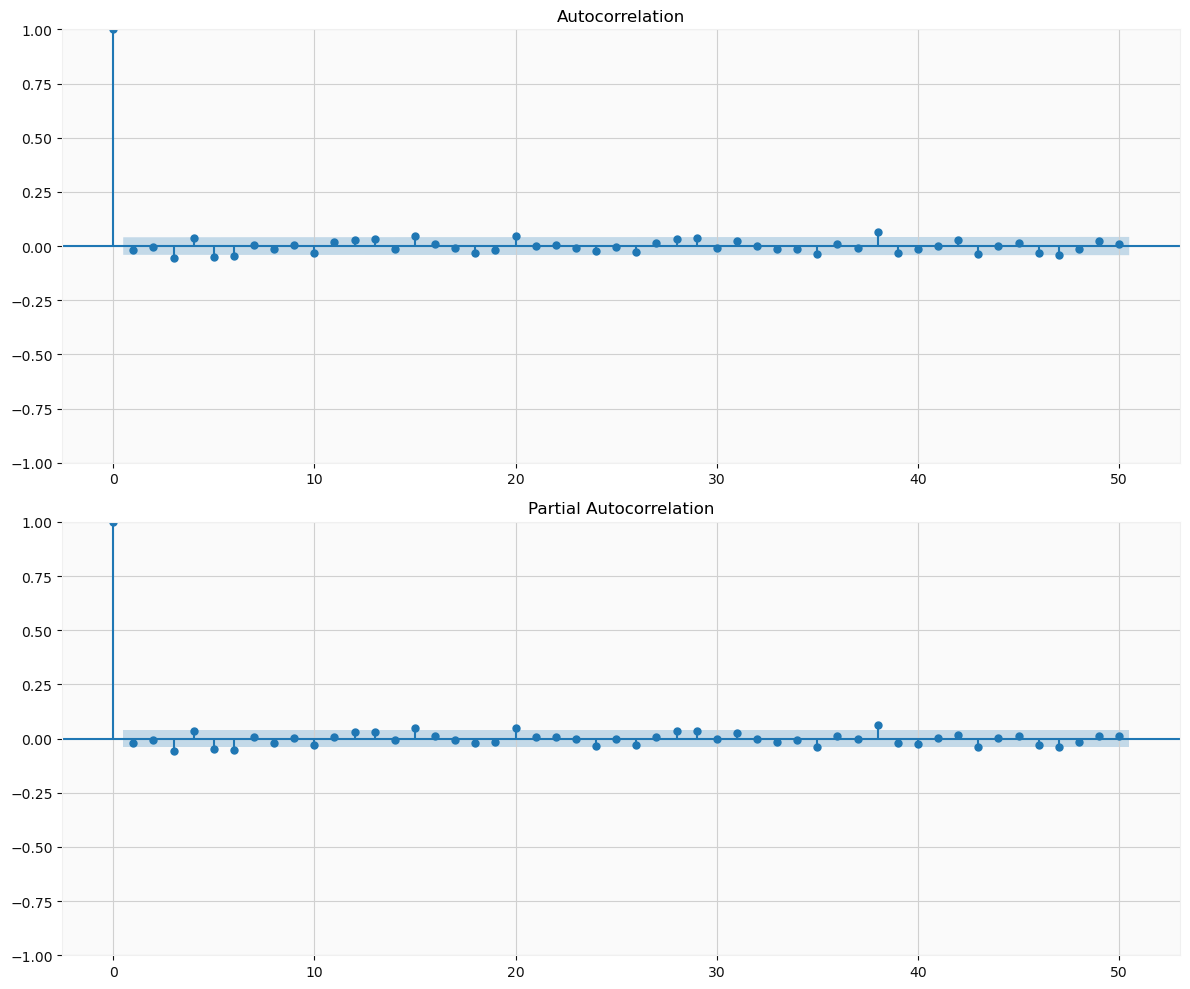

In [33]:
def plot_acf_pacf(df, column='Close', lags=50):
    series = df[column]

    fig, axes = plt.subplots(2, 1, figsize=(12, 10))

    
    axes[0].set_title('ACF')
    plot_acf(series, lags=lags, ax=axes[0])

    
    axes[1].set_title('PACF')
    plot_pacf(series, lags=lags, ax=axes[1])

    plt.tight_layout()
    plt.show()


plot_acf_pacf(df)


# Seasonal Decomposition: Additive

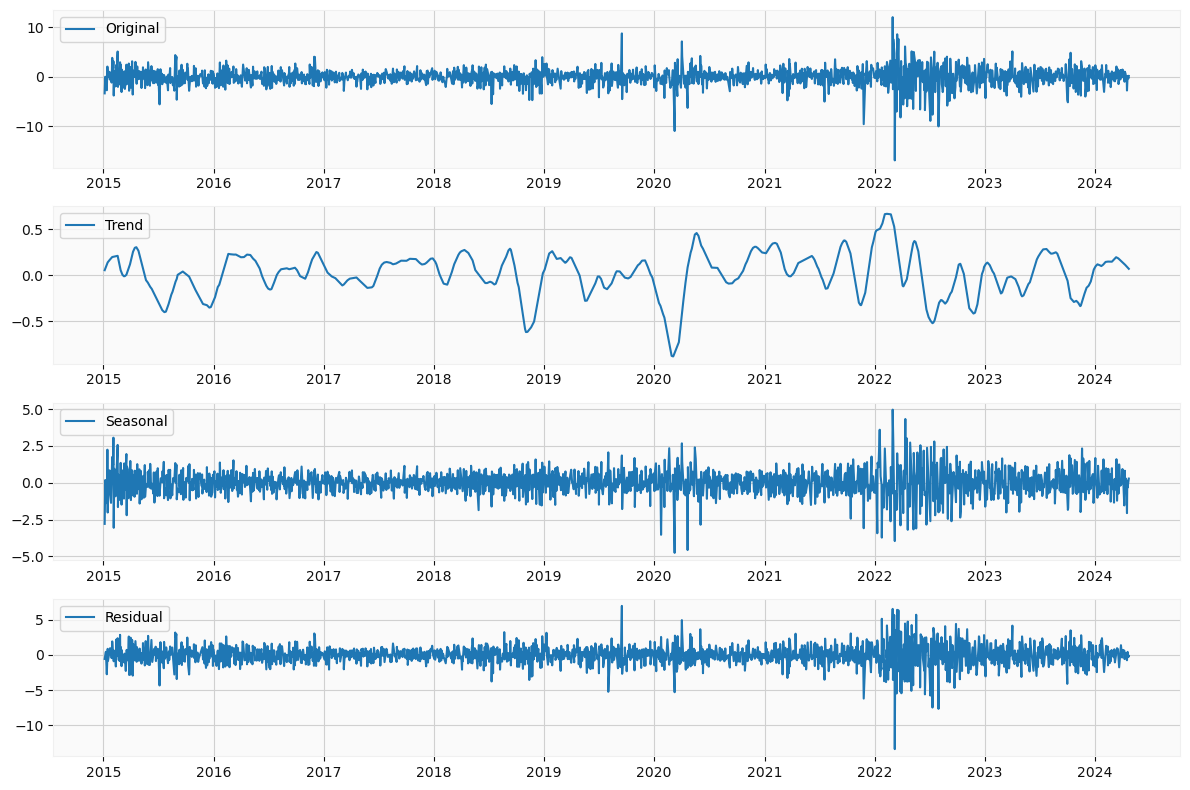

In [34]:
from statsmodels.tsa.seasonal import STL

def plot_components_stl(df, column='Close', period=12):
    stl = STL(df[column], period=period)
    result = stl.fit()

    components = {
        'Original': df[column],
        'Trend': result.trend,
        'Seasonal': result.seasonal,
        'Residual': result.resid
    }

    plt.figure(figsize=(12, 8))
    for i, (label, component) in enumerate(components.items(), start=1):
        plt.subplot(4, 1, i)
        plt.plot(component, label=label)
        plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

plot_components_stl(df, period=30)



Trend: This subplot shows the trend component of the decomposition. It represents the long-term movement of the prices without the seasonal fluctuations.

Seasonal: This subplot shows the seasonal component of the decomposition. It represents the cyclical pattern of the prices that repeats over the seasonal period (likely a year in this case).

Residuals: This subplot shows the residuals from the decomposition. These are the remaining fluctuations in the price series that are not explained by the trend and seasonal components.

In [35]:
if df['Close'].min() > 0:
    print("All values in 'value' column are positive.")
else:
    print("There are negative or zero values in the 'value' column.")


There are negative or zero values in the 'value' column.


Due to existing negative/zero values we cannot conduct multiplicative decomposition

# Splitting Data

In [36]:
data=df[[ 'Open', 'High', 'Low',  'Volume', 'Month', 'Year',
        'Series','Close']]

In [37]:
# split data into train-test set
train = data[data['Year'] < 2023]
test = data[data['Year'] >= 2023]
# check shape
train.shape, test.shape

((2006, 8), (329, 8))

In [38]:
X_train=train[['Open', 'High', 'Low',  'Volume', 'Month', 'Year',
        'Series']]
y_train=train['Close']
X_test=test[['Open', 'High', 'Low',  'Volume', 'Month', 'Year',
        'Series']]
y_test=test['Close']
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2006, 7), (329, 7), (2006,), (329,))

In [39]:
# Set frequency to 'M' for monthly frequency
train = train.asfreq('M')

# Forecasting Models

## Univariate 

> Exponential Smoothing

In [40]:
target_column=y_test

In [41]:
optimal_alpha = None
best_mse = None
db = df.iloc[:, :].values.astype('float32')
mean_results_for_all_possible_alpha_values = np.zeros(9)
for alpha in range(0, 9):
    pt = np.mean(db[:, 0][0:5])
    mean_for_alpha = np.zeros(len(db))
    mean_for_alpha[0] = np.power(db[0][0] - pt, 2)
    for i in range(1, len(db)):
        pt = pt + ((alpha + 1) * 0.1) * (db[i - 1][0] - pt)
        mean_for_alpha[i] = np.power(db[i][0] - pt, 2)
    mean_results_for_all_possible_alpha_values[alpha] = np.mean(mean_for_alpha)
optimal_alpha = (np.argmin(mean_results_for_all_possible_alpha_values) + 1) * 0.1
best_mse = np.min(mean_results_for_all_possible_alpha_values)
print("Best MSE = %s" % best_mse)
print("Optimal alpha = %s" % optimal_alpha)

Best MSE = 2.5869507808448358
Optimal alpha = 0.9


In [42]:
pt = np.mean(db[:, 0][0:5])
for i in range(1, len(db) + 1):
    pt = pt + optimal_alpha * (db[i - 1][0] - pt)
print("Next observation = %s" % pt)

Next observation = 87.21094783144733


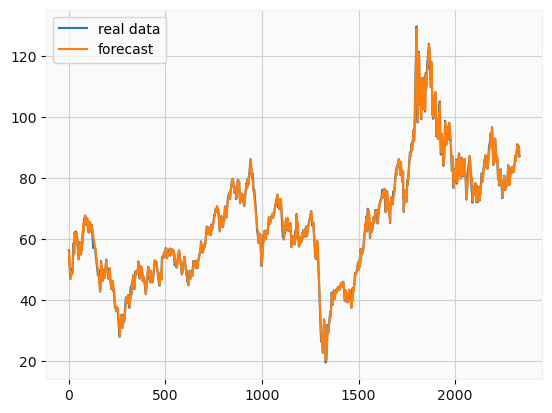

In [43]:
ses_forecast = np.zeros(len(db) + 1)
pt = np.mean(db[:, 0][0:5])
ses_forecast[0] = pt
for i in range(1, len(db) + 1):
    pt = pt + optimal_alpha * (db[i - 1][0] - pt)
    ses_forecast[i] = pt
plt.plot(db[:, 0],label = 'real data')
plt.plot(ses_forecast, label = 'forecast')
plt.legend()
plt.show()

Last 30 days actual vs. forecast

In [44]:
# Slice the last 30 days of actual and forecasted values
last_30_days_db = target_column [-30:]
last_30_days_ses_forecast = ses_forecast[-30:]

# Calculate the differences between actual and forecasted values for the last 30 days
last_30_days_differences = last_30_days_db - last_30_days_ses_forecast

# Create a DataFrame to display the results in a table format
df_results = pd.DataFrame({
    'Actual': last_30_days_db,
    'Forecast': last_30_days_ses_forecast,
    'Difference': last_30_days_differences
})
df_results

,Actual,Forecast,Difference
Date,,,
2024-03-12,-0.290001,82.391734,-82.681735
2024-03-13,2.110001,82.390173,-80.280172
2024-03-14,1.389999,83.821020,-82.431021
2024-03-15,-0.080002,84.999100,-85.079101
2024-03-18,1.550003,85.341907,-83.791904
2024-03-19,0.489998,86.699189,-86.209192
2024-03-20,-1.430000,87.167920,-88.597920
2024-03-21,-0.169998,86.260795,-86.430793
2024-03-22,-0.349998,85.621082,-85.971081


Calculating Accuracy

In [45]:
rmse = sqrt(mean_squared_error(db[:, 0], ses_forecast[1:]))

mse = mean_squared_error(db[:, 0], ses_forecast[1:])

r2 = r2_score(db[:, 0], ses_forecast[1:])

print("RMSE:", rmse)
print("MSE:", mse)
print("R-squared:", r2)


RMSE: 0.16084000686535774
MSE: 0.025869507808448326
R-squared: 0.9999265488311221


Comparing actual vs. predicted data for the last 30 days

In [46]:
alpha = 0.9
series = ses_forecast

# Get the last observed value
last_observed_value = series[-1]

# Create a date range for the next 30 days in 2024
next_30_days = pd.date_range(start='2024-04-18', periods=30, freq='D')

# Forecast the next 30 days using Simple Exponential Smoothing (SES)
forecast_values = np.zeros(30)  # Initialize an array to store forecast values

for i in range(30):
    forecast_values[i] = alpha * series[-1-i] + (1 - alpha) * last_observed_value
    last_observed_value = forecast_values[i]  # Update the last observed value for the next iteration

# Create a DataFrame from the forecast array
next_30_days_forecast_df = pd.DataFrame(forecast_values, index=next_30_days, columns=['SES Forecast'])

next_30_days_forecast_df

,SES Forecast
2024-04-18,87.210948
2024-04-19,87.056598
2024-04-20,87.036685
2024-04-21,87.637931
2024-04-22,89.842398
2024-04-23,90.365262
2024-04-24,90.363743
2024-04-25,90.311524
2024-04-26,90.433646
2024-04-27,89.694297


> Forecast by Moving Average

In [47]:
def calculate_moving_average(df, column_name, window_size):

    df['MA{}'.format(window_size)] = df[column_name].rolling(window=window_size).mean()
    return df


In [48]:
close_value = df.loc['2024-02-01':'2024-04-16', 'Close']
df_MA3= pd.DataFrame(close_value , index=df.loc['2024-02-01':'2024-04-16'].index)
window_size = 3
df_with_ma = calculate_moving_average(df_MA3, 'Close', window_size)
df_with_ma

,Close,MA3
Date,,
2024-02-01,-3.010002,NaN
2024-02-02,-1.369995,NaN
2024-02-05,0.659996,-1.240000
2024-02-06,0.599998,-0.036667
2024-02-07,0.620003,0.626666
2024-02-08,2.419998,1.213333
2024-02-09,0.560005,1.200002
2024-02-12,-0.190002,0.930000
2024-02-13,0.769997,0.380000


Comparing actual vs. predicted data for the last 30 days

In [49]:
last_30_days_db = df_with_ma['Close'][-30:]
last_30_days_MA_forecast = df_with_ma['MA3'][-30:]

last_30_days_differences = last_30_days_db - last_30_days_MA_forecast

df_table = pd.DataFrame({
    'Actual': last_30_days_db,
    'Forecast': last_30_days_MA_forecast,
    'Difference': last_30_days_differences
})

df_table

,Actual,Forecast,Difference
Date,,,
2024-03-05,-0.760002,-0.526667,-0.233335
2024-03-06,0.919998,-0.196668,1.116666
2024-03-07,0.000000,0.053332,-0.053332
2024-03-08,-0.879997,0.013334,-0.893331
2024-03-11,0.129997,-0.250000,0.379997
2024-03-12,-0.290001,-0.346667,0.056666
2024-03-13,2.110001,0.649999,1.460002
2024-03-14,1.389999,1.070000,0.320000
2024-03-15,-0.080002,1.139999,-1.220001


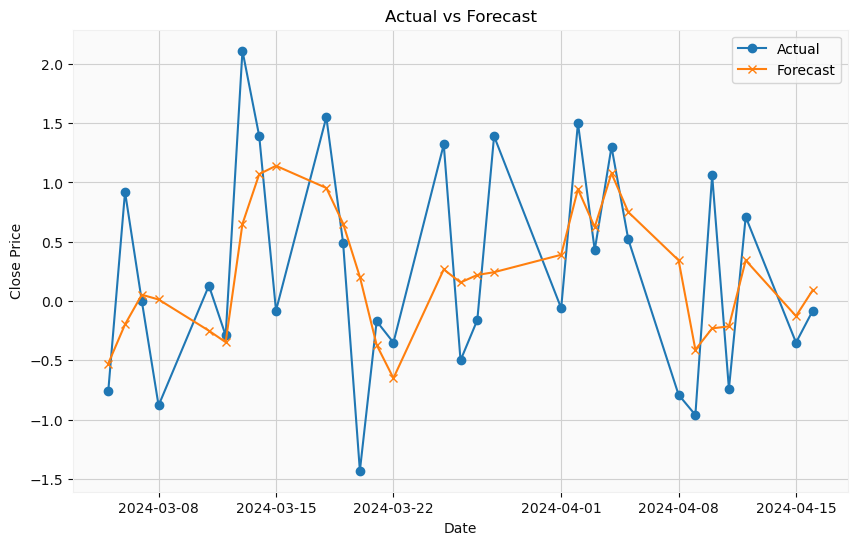

In [50]:
# Plot actual vs forecast
plt.figure(figsize=(10, 6))
plt.plot(last_30_days_db.index, last_30_days_db, label='Actual', marker='o')
plt.plot(last_30_days_MA_forecast.index, last_30_days_MA_forecast, label='Forecast', marker='x')
plt.title('Actual vs Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

Calculating Accuracy

In [51]:
forecasted_values = df_with_ma['MA3'][2:]
actual_data=df_with_ma['Close'][2:]

rmse = np.sqrt(mean_squared_error(actual_data, forecasted_values))
mse = mean_squared_error(actual_data, forecasted_values)
r2 = r2_score(actual_data, forecasted_values)

print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))
print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("R-squared (R2): {:.2f}".format(r2))



Root Mean Squared Error (RMSE): 0.84
Mean Squared Error (MSE): 0.70
R-squared (R2): 0.18


> Forecast by ARIMA

In [52]:
order = (13, 1, 0)
# Fit ARIMA model
ARIMA_model = ARIMA(train['Close'].values, order=order)
ARIMA_model_fit = ARIMA_model.fit()

# Summary of the model
ARIMA_model_fit.summary()

/Users/mahmoud/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   95
Model:                ARIMA(13, 1, 0)   Log Likelihood                -117.300
Date:                Tue, 23 Apr 2024   AIC                            262.600
Time:                        08:26:33   BIC                            298.206
Sample:                             0   HQIC                           276.982
                                 - 95                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2362      0.232     -5.327      0.000      -1.691      -0.781
ar.L2         -1.4972      0.305     -4.910      0.000      -2.095      -0.900
ar.L3         -1.4068      0.450     -3.124      0.002      -2.289      -0.524
ar.L4         -0.8798      0.521     -1.689      0.091      -1.901       0.141
ar.L5         -0.6639      0.523     -1.269      0.204      -1.689       0.361
ar.L6         -0.4138      0.519     -0.798      0.425      -1.430       0.603
ar.L7         -0.5685      0.396     -1.436      0.151      -1.345       0.208
ar.L8         -0.9463      0.385     -2.456      0.014      -1.702      -0.191
ar.L9         -0.8817      0.445     -1.981      0.048      -1.754      -0.009
ar.L10        -1.1668      0.429     -2.719      0.007      -2.008      -0.326
ar.L11        -0.8463      0.423     -2.003      0.045      -1.675      -0.018
ar.L12        -0.6126      0.283     -2.163      0.031      -1.168      -0.057
ar.L13        -0.2428      0.229     -1.062      0.288      -0.691       0.205
sigma2         1.2147      0.314      3.872      0.000       0.600       1.830
===================================================================================
Ljung-Box (L1) (Q):                   0.49   Jarque-Bera (JB):                24.37
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):               1.48   Skew:                             0.44
Prob(H) (two-sided):                  0.28   Kurtosis:                         5.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
ARIMA_forecast = ARIMA_model_fit.forecast(steps=len(test))

In [54]:
rmse = sqrt(mean_squared_error(test['Close'], ARIMA_forecast))
print(f"RMSE: {rmse:.2f}") 

RMSE: 1.66


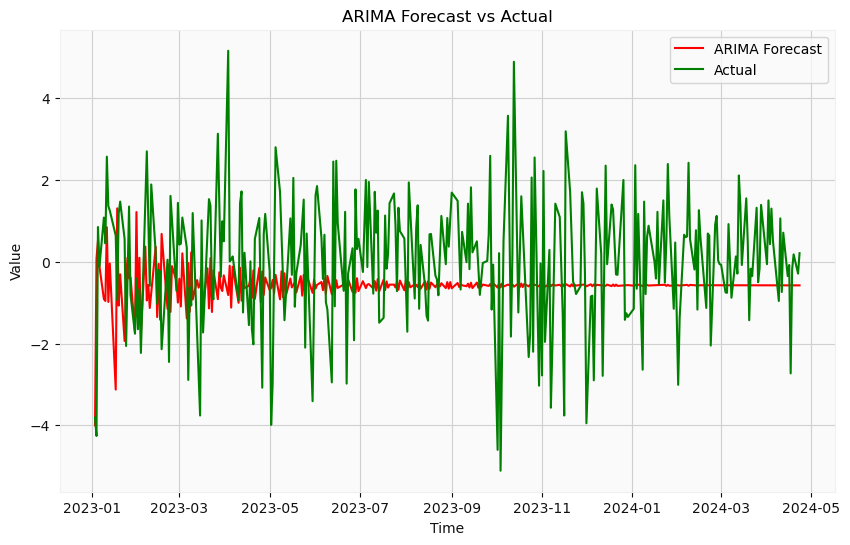

In [55]:
# Plot actual vs forecast
plt.figure(figsize=(10, 6))
# plt.plot(train['Close'], label='Training Data')
plt.plot(test.index, ARIMA_forecast, color='red', label='ARIMA Forecast')
plt.plot(test.index, test['Close'], color='green', label='Actual')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


Comparing actual vs. predicted data for the last 30 days

In [56]:
last_30_days_actual=test['Close'][-30:].values
last_30_days_arima_forecast=ARIMA_forecast[-30:]
# Calculate the differences between actual and ARIMA forecasted values
last_30_days_differences = last_30_days_actual - last_30_days_arima_forecast

# Create a DataFrame to display the results
df_ARIMAtable = pd.DataFrame({
    'Actual': last_30_days_actual,
    'Forecast': last_30_days_arima_forecast,
    'Difference': last_30_days_differences
})

# Print the DataFrame
df_ARIMAtable

,Actual,Forecast,Difference
0,-0.290001,-0.583821,0.293820
1,2.110001,-0.569296,2.679296
2,1.389999,-0.582631,1.972631
3,-0.080002,-0.571475,0.491473
4,1.550003,-0.579654,2.129657
5,0.489998,-0.574981,1.064979
6,-1.430000,-0.575908,-0.854093
7,-0.169998,-0.578664,0.408666
8,-0.349998,-0.572565,0.222567
9,1.320000,-0.581416,1.901415


In [57]:
rmse = sqrt(mean_squared_error(last_30_days_actual, last_30_days_arima_forecast))
print(f"RootComparing actual vs. predicted data for the last 30 days Mean Squared Error (RMSE): {rmse:.2f}") 

RootComparing actual vs. predicted data for the last 30 days Mean Squared Error (RMSE): 1.25


by examining the strikes in ACF and PACF plots: we had 11 strikes in ACF, therefore the 'ideal' p parameter would be 11, for PACF we got 5 strikes so the ideal q parameter would be 5 however we got 123625605 RMSE by using parameters (11,5,0)

p: 
0,0,0: 35.05

1,0,0: 35.05

2,0,0: 35.06

3,0,0: 35.06

4,0,0: 35.03

5,0,0: 35.02

6,0,0: 35.03

7,0,0: 35.08

8,0,0: 35.15

9,0,0: 35.22

10,0,0:35.23

20,0,0: 35.24

Therefore the best p value is 5

q:

(5,1,0): 34.87

(5,2,0): 1181.20

(5,3,0): 139144.24

(5,10,0); 2211326555200925696.00

(5,20,0);20966073869711559822006373394153472.00

Therefore the best q value is 1

d:
(5,1,1): 35.02

(5,1,2): 35.04

(5,1,4): 35.17

(5,1,6): 35.15

(5,1,10): 35.22

(5,1,20): 35.37

Therefore the best d value is 0

Our ideal parameters are (5,1,0) with RMSE of 34.87

## Multivariate

>SARIMAX

In [58]:
SARIMAX_model = pm.auto_arima(y_train, X_train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=20, max_q=20, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=False)   # Disable stepwise search

SARIMAX_model.summary()

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=18371.499, Time=0.70 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5115.238, Time=2.37 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=5111.825, Time=1.57 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=5110.768, Time=3.44 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=5112.707, Time=3.73 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=5110.983, Time=4.29 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=5114.212, Time=1.08 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=5112.197, Time=3.15 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=5111.325, Time=1.39 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=5112.299, Time=3.46 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=5114.518, Time=5.33 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=5110.846, Time=2.58 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=5113.509, Time=6.32 sec


/Users/mahmoud/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/mahmoud/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=5131.150, Time=2.50 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=5.75 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=5110.433, Time=4.77 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=5112.385, Time=4.90 sec


/Users/mahmoud/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/mahmoud/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,0,2)(0,0,0)[0]             : AIC=5133.166, Time=3.18 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=5112.201, Time=6.68 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=5114.156, Time=9.64 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=5112.162, Time=6.92 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0]          
Total fit time: 83.779 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2006
Model:               SARIMAX(3, 0, 0)   Log Likelihood               -2544.216
Date:                Tue, 23 Apr 2024   AIC                           5110.433
Time:                        08:27:57   BIC                           5172.076
Sample:                             0   HQIC                          5133.063
                               - 2006                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open          -1.6158      0.013   -127.004      0.000      -1.641      -1.591
High           0.7566      0.010     74.669      0.000       0.737       0.776
Low            0.8599      0.012     72.773      0.000       0.837       0.883
Volume      -1.23e-06   1.38e-06     -0.889      0.374   -3.94e-06    1.48e-06
Month         -0.0030      0.006     -0.497      0.619      -0.015       0.009
Year        4.259e-05   4.77e-05      0.893      0.372   -5.09e-05       0.000
Series       5.36e-05   4.53e-05      1.183      0.237   -3.52e-05       0.000
ar.L1         -0.0681      0.018     -3.879      0.000      -0.102      -0.034
ar.L2          0.0495      0.016      3.133      0.002       0.019       0.080
ar.L3         -0.0348      0.017     -2.062      0.039      -0.068      -0.002
sigma2         0.7408      0.009     82.379      0.000       0.723       0.758
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             17629.08
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.85   Skew:                            -0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
SARIMAX= SARIMAX(y_train, X_train, order=(5,0,0))
model_sarimax= SARIMAX.fit()

# Make predictions
predictions_sarimax = model_sarimax.predict(start=0, end=len(X_test)-1, exog=X_test, typ='levels')

model_sarimax.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26774D+00    |proj g|=  8.15596D+03


/Users/mahmoud/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mahmoud/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13      2     50      2     0     0   8.098D+03   1.268D+00
  F =   1.2677372293609017     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/mahmoud/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2006
Model:               SARIMAX(5, 0, 0)   Log Likelihood               -2543.081
Date:                Tue, 23 Apr 2024   AIC                           5112.162
Time:                        08:28:02   BIC                           5185.012
Sample:                             0   HQIC                          5138.907
                               - 2006                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open          -1.6158      0.013   -124.739      0.000      -1.641      -1.590
High           0.7566      0.010     74.208      0.000       0.737       0.777
Low            0.8599      0.012     73.471      0.000       0.837       0.883
Volume     -1.254e-06   1.39e-06     -0.904      0.366   -3.97e-06    1.47e-06
Month         -0.0030      0.006     -0.509      0.611      -0.014       0.008
Year        4.259e-05   4.68e-05      0.911      0.362   -4.91e-05       0.000
Series       5.36e-05   4.35e-05      1.232      0.218   -3.17e-05       0.000
ar.L1         -0.0689      0.018     -3.912      0.000      -0.103      -0.034
ar.L2          0.0485      0.016      3.072      0.002       0.018       0.079
ar.L3         -0.0340      0.017     -2.014      0.044      -0.067      -0.001
ar.L4         -0.0128      0.015     -0.878      0.380      -0.041       0.016
ar.L5         -0.0320      0.018     -1.779      0.075      -0.067       0.003
sigma2         0.7403      0.009     80.442      0.000       0.722       0.758
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             17352.41
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.82   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

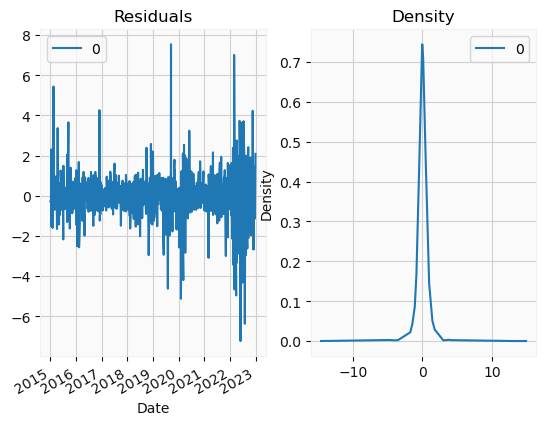

In [60]:
# Plot residual errors
residuals = pd.DataFrame(model_sarimax.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [61]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions_sarimax))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions_sarimax))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions_sarimax)))

Mean Absolute Error: 1.4911945039448815
Mean Squared Error: 3.580969244101328
Root Mean Squared Error: 1.8923449062212017


Actual vs. Predicted

In [62]:
df_SARIMAXResults = pd.DataFrame({'actual':y_test.values, 'predicted':predictions_sarimax})
df_SARIMAXResults .head()

,actual,predicted
Date,,
2015-01-05,-3.810005,-3.029035
2015-01-06,-4.260002,-2.006649
2015-01-07,0.850006,-0.540762
2015-01-08,-0.120003,-0.288894
2015-01-09,1.080002,-1.702235


>LSTM

In [63]:
# Define LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

/Users/mahmoud/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [64]:
lstm_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
X_train_array = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)  # Convert to NumPy array and reshape

In [66]:
# Train LSTM model
lstm_model.fit(X_train, y_train, epochs=50, verbose=1)


Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 47472.6094
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14902.6973
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4281.4712
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1027.5856
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1175.3934
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1859.9745
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1363.4476
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 756.4142
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 460.2607
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 699.0520
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2451.5391
Epoch 12/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 471.3465
Epoch 13/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 301.3878
Epoch 14/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 410.0963
Epoch 15/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/s

In [67]:
# Use LSTM model to make predictions
test_preds_lstm = lstm_model.predict(X_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [68]:
test_preds_lstm

array([[ 5.55104713e+01],
       [ 2.42376971e+00],
       [ 7.46905613e+00],
       [-4.03202629e+00],
       [ 2.78563762e+00],
       [ 7.79051352e+00],
       [ 2.78183055e+00],
       [ 2.99322200e+00],
       [-8.81051064e+00],
       [ 7.53677785e-02],
       [-4.00584221e+01],
       [ 3.21339488e+00],
       [-1.32910242e+01],
       [ 7.35804653e+00],
       [-3.58702240e+01],
       [ 8.01216221e+00],
       [ 5.48054409e+00],
       [-7.56713033e-01],
       [-6.84379101e+00],
       [ 2.63739276e+00],
       [ 1.83496666e+01],
       [-1.01353369e+01],
       [-6.77793980e+00],
       [ 2.37070537e+00],
       [-1.41343241e+01],
       [ 2.89591861e+00],
       [ 2.65308261e+00],
       [ 2.52301860e+00],
       [ 8.25017929e+00],
       [ 8.78886890e+00],
       [ 8.04299545e+00],
       [ 8.78907681e+00],
       [ 6.87699223e+00],
       [ 2.19177318e+00],
       [ 8.88897991e+00],
       [ 6.26420975e+00],
       [-3.76430660e-01],
       [-1.22894640e+01],
       [-8.5

Accuracy

In [69]:
mse = mean_squared_error(y_test,test_preds_lstm)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, test_preds_lstm)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")


MSE: 385.1405693191715
RMSE: 19.624998581380115
R2 Score: -163.4885638032223


> XGBOOST

In [70]:
# Define XGBoost model
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)

In [71]:
# Train XGBoost model
xgb_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)], verbose=False)

/Users/mahmoud/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [72]:
# Use XGBoost model to make predictions
test_preds_xgb = xgb_model.predict(X_test)

Accuracy

In [73]:
from sklearn.metrics import mean_squared_error, r2_score

rmse_test = mean_squared_error(y_test, test_preds_xgb, squared=False)
mse_test = mean_squared_error(y_test, test_preds_xgb)
r2_test = r2_score(y_test, test_preds_xgb)

# Print the results

print("Test RMSE:", rmse_test)
print("Test MSE:", mse_test)
print("Test R2:", r2_test)



Test RMSE: 1.530222843220325
Test MSE: 2.3415819499132957
Test R2: -5.941376068396842e-05


# HYBRID MODEL: LSTM-XGBoost Hybrid Stock Forecasting

In [74]:
xgb_test_preds = xgb_model.predict(X_test)

lstm_test_preds = lstm_model.predict(test_preds_lstm )

# Combine the predictions of the XGBoost and LSTM models
hybrid_preds = []
for i in range(len(y_test)):
    hybrid_preds.append(0.5 * (xgb_test_preds[i] + lstm_test_preds[i]))

# Evaluate the hybrid model
print("Hybrid Model Evaluation:")
print("Test Data RMSE:", np.sqrt(mean_squared_error(y_test, hybrid_preds)))

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Hybrid Model Evaluation:
Test Data RMSE: 1.551485629341508


# HYBRID MODEL: SARIMAX and XGBOOST

In [75]:
sarimax_test_preds = model_sarimax.predict(n_periods=len(X_test), exogenous=X_test)

# Make predictions using the XGBoost model
xgb_test_preds = xgb_model.predict(X_test)

# Combine the predictions of the SARIMAX and XGBoost models
hybrid_preds = []

for i in range(len(X_test)):
    hybrid_preds.append(0.5 * (xgb_test_preds[i] + sarimax_test_preds[i]))

# Evaluate the hybrid model
print("Hybrid Model Evaluation:")
print("Test Data RMSE:", np.sqrt(mean_squared_error(y_test, hybrid_preds)))


Hybrid Model Evaluation:
Test Data RMSE: 1.6236562333727629
